# Code stuff - not slides!

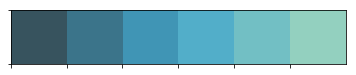

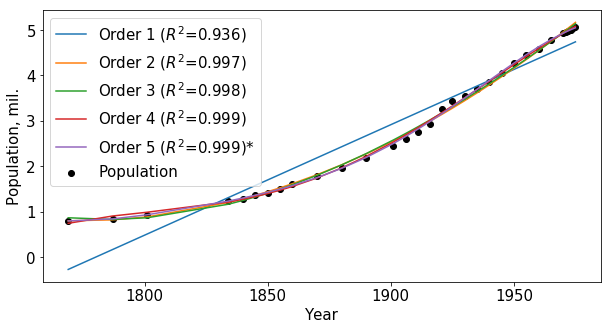

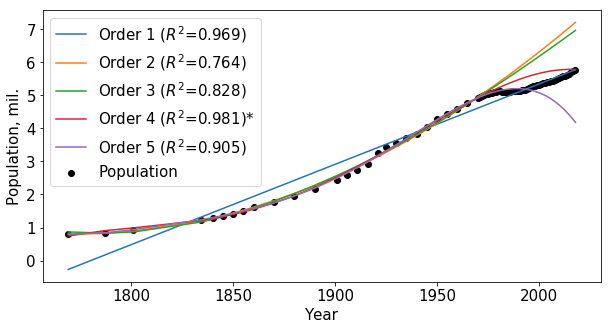

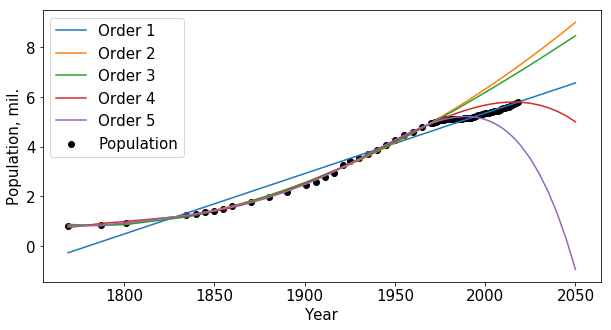

In [17]:
%run pop_plots.ipynb

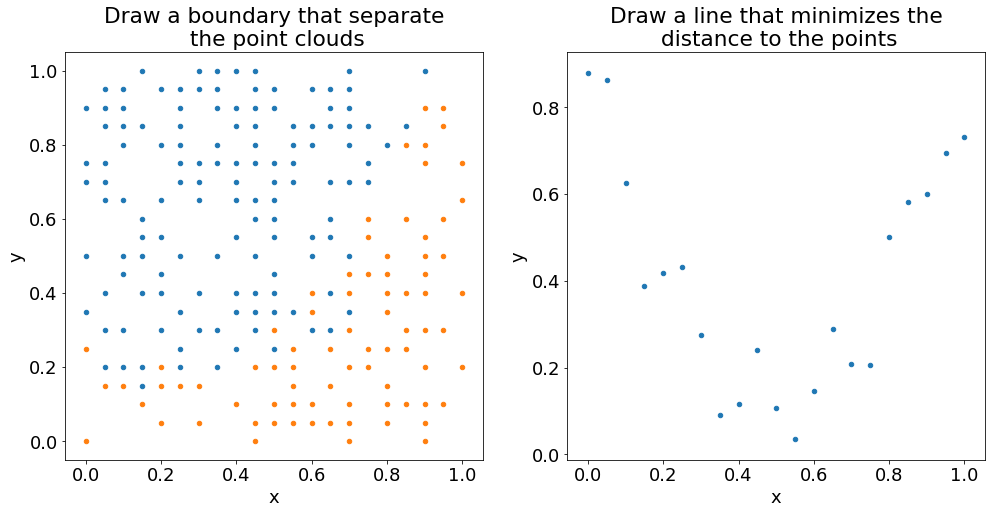

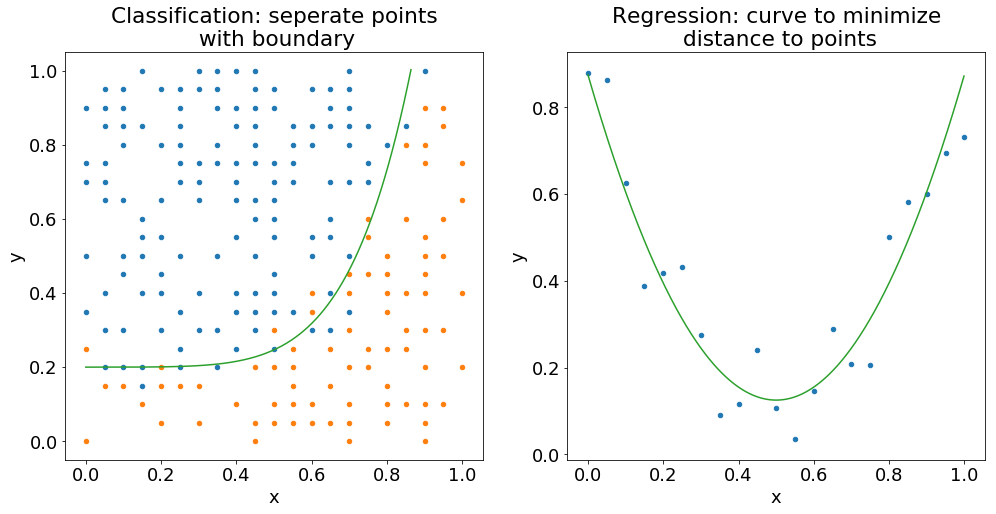

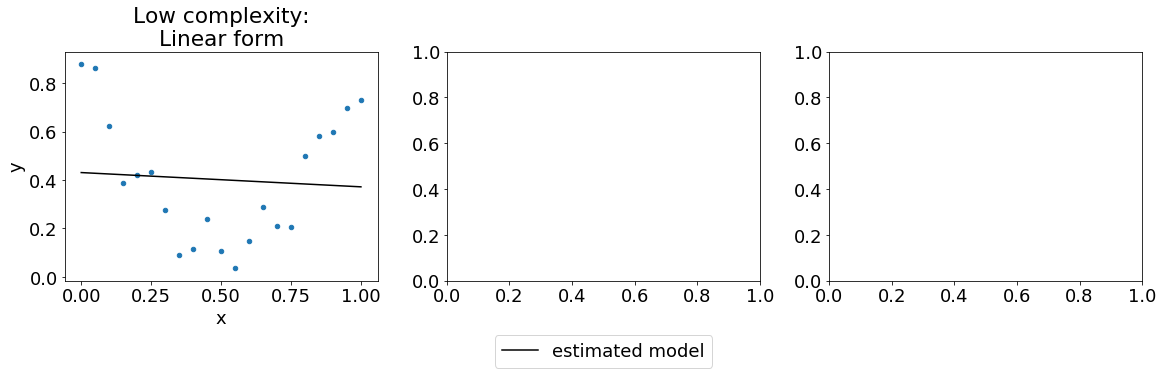

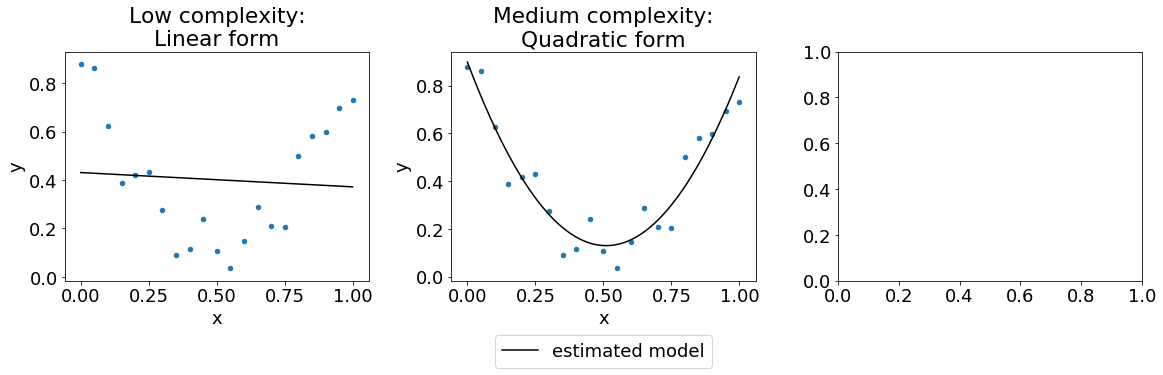

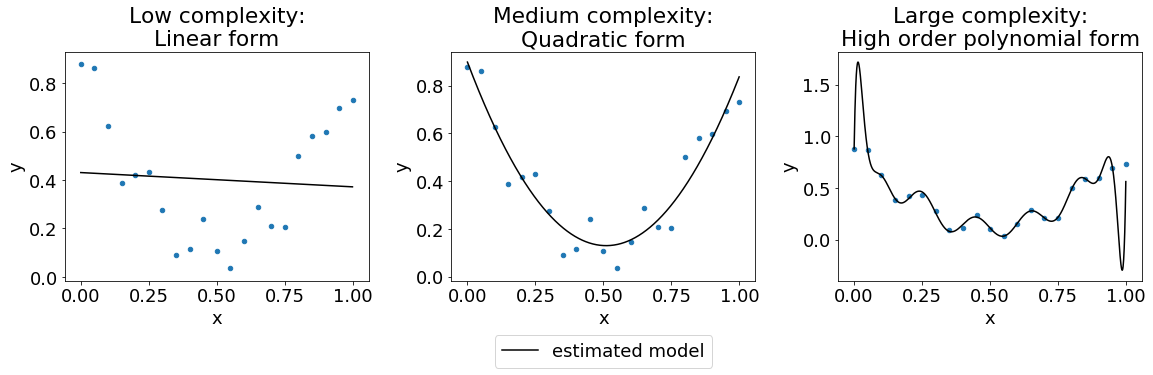

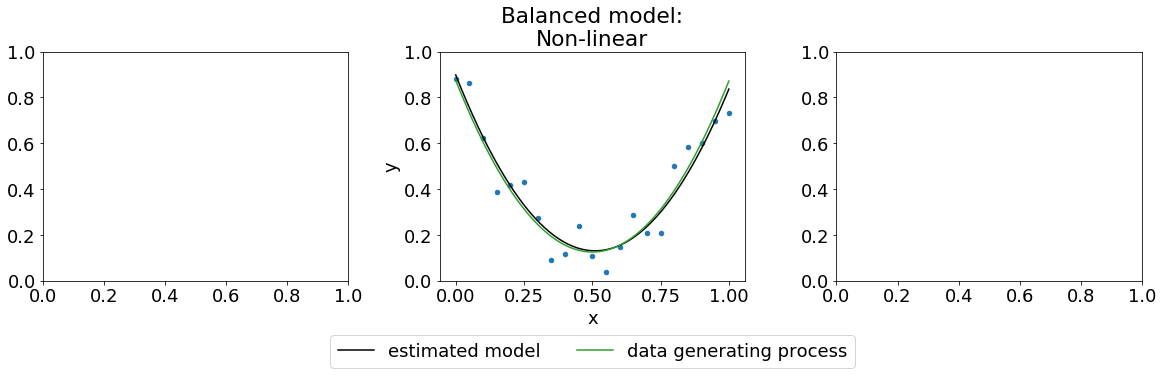

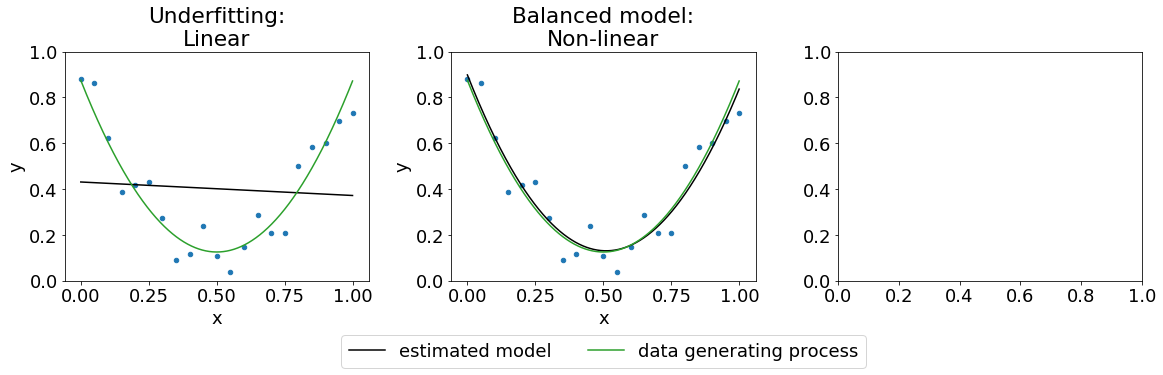

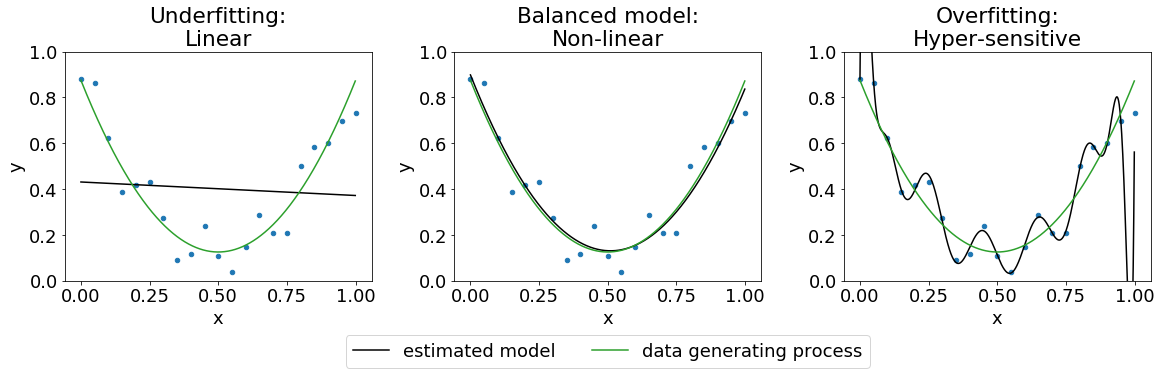

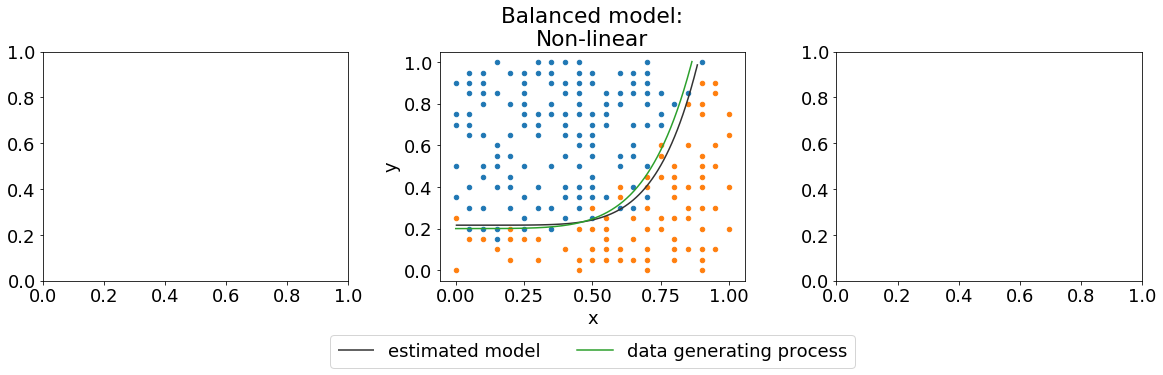

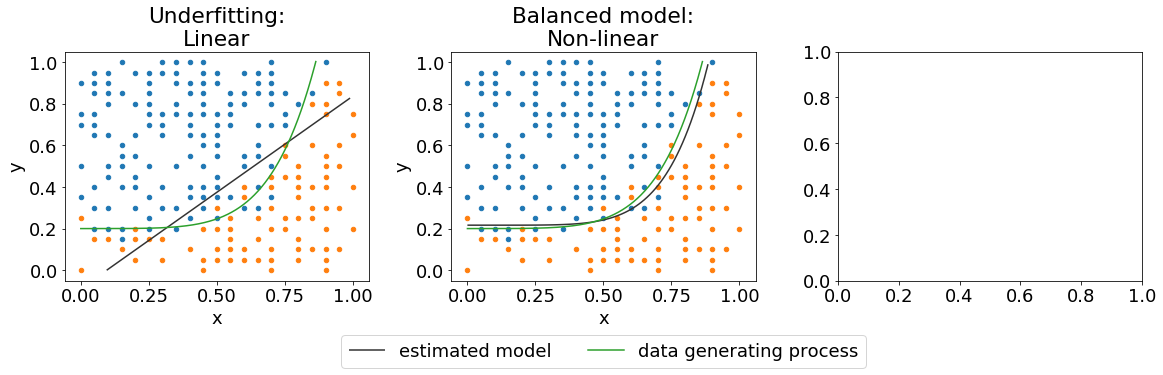

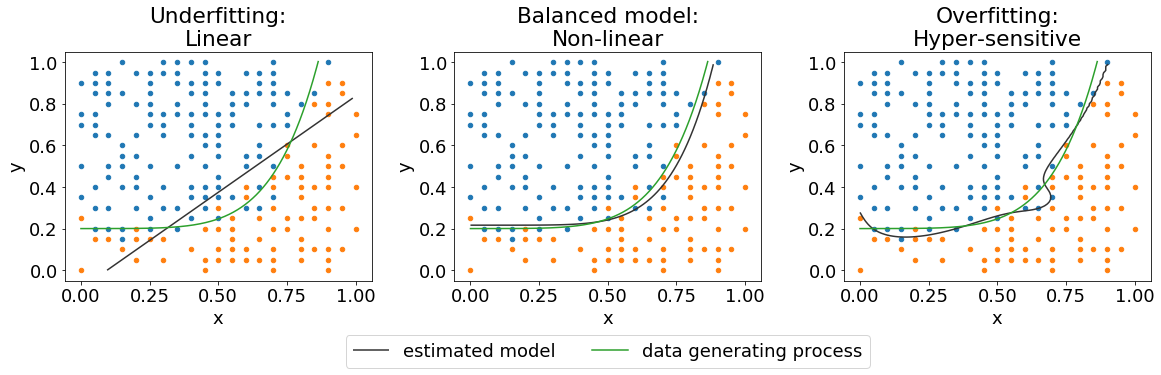

In [18]:
%run ../ML_plots.ipynb

In [19]:
import requests
import os
base_url = 'https://raw.githubusercontent.com/rasbt/python-machine-learning-book-2nd-edition/master/code/ch02/'

for filename in ('ch02.py', 'iris.data', 'iris.names.txt'):
    if not os.path.exists(filename):
        response = requests.get(base_url+filename)
        with open(filename,'wb') as f:
            f.write(response.text.encode('utf-8'))
    
from ch02 import Perceptron, AdalineGD, AdalineSGD, plot_decision_regions

# Session 11:
## Machine learning introduction

*Andreas Bjerre-Nielsen*

## Agenda

1. [Why machine learing](#Why-machine-learning)
1. [What is machine learning](#Machine-learning-overview)
1. Classification models
    1. [the perceptron](#The-perceptron-model)
    1. [beyond the perceptron](#Beyond-the-perceptron)
    1. [maximum margin classification](#Maximum-margin-classification)

## Learning ML

- During lectures copy code for see what it does - listen to me
- After lecture > understand code details
- Learn with your group - VERY IMPORTANT!

# Why machine learning

## Value of modelling 
*Why are models useful?*

Models are pursued with differens aims. Suppose we have a regression model, $y=X\beta+\epsilon$.

- Social science:
    - They teach us something about the world.
    - We want to estimate $\hat{\beta}$ and distribution
- Data science:
    - To make optimal future decisions and precise predictions, i.e. $\hat{y}$.    

## Model fragility (1)
*What is a polynomial regression?*

- Fitting a curve with an *n-dimenstional polynomial*
- Can fit any "regular" curve ~ Taylor Series Approximation.

## Model fragility (2)
*Suppose we build models of the size of the Danish population, how do polynomial fits perform?*
- We use data from the years 1769-1975.

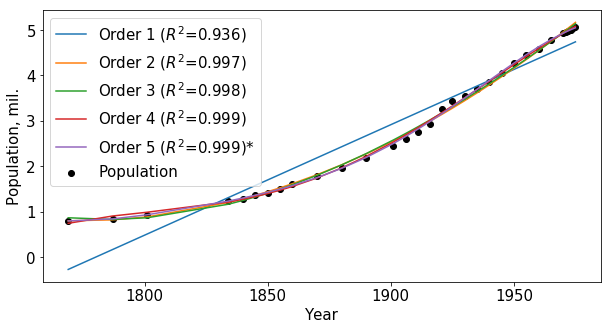

In [20]:
f_pop1

## Model fragility (3)
*Which model performs best when we extend the period to 1975?*

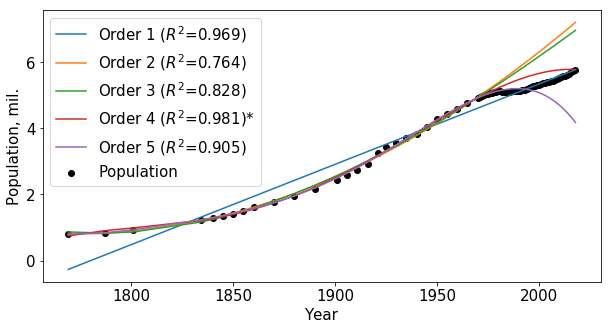

In [21]:
f_pop2

## Model fragility (4)
*What happens if we extend the prediction period until 2050? See the fifth order.*

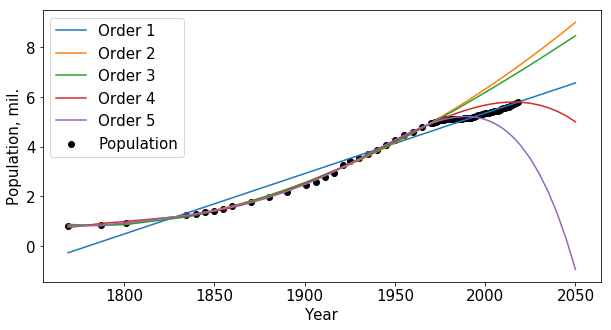

In [22]:
f_pop3

## Model fragility (5)
*What trade off do we face in modelling?*

- Making a model that is to simple and does not capture enough of data (`underfitting`)
- Making a model with great fit on estimation data, but poor out-of-sample prediction (`overfitting`)

The goal of machine learning is to find models that minimize these two problems simultaneously.

# Machine learning overview

## What is machine learning (1)
*Can you define machine learning, i.e. ML?*

- Supervised learning
  - Models designed to infer a relationship between input and **labeled** data. 
     
  - Requirement: labels on data
- Unsupervised learning
  - Find patterns and relationships from **unlabeled** data. 
      - This may involve clustering, dimensionality reduction and more.  
  

## What is machine learning (2)
*How might this be useful for social scientists?*
- Supervised:
    - .. 
    - .. 
- Unsupervised:
    - ..  

## What is machine learning (3)
*How can we categorize a supervised learning model?*

Suppose we have model 
\begin{align}y=w_0+w_1x_1+..+w_k x_k \end{align}
- We distinguish by type of the `target` variable `y`

## What is machine learning (4)
*Which one is classification, which one is regression?*

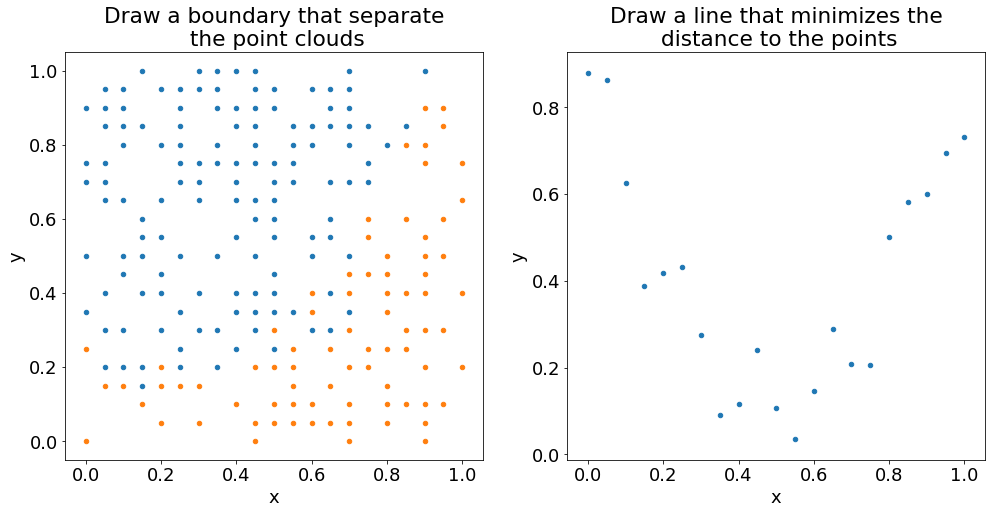

In [7]:
f_identify_question

## What is machine learning (5)

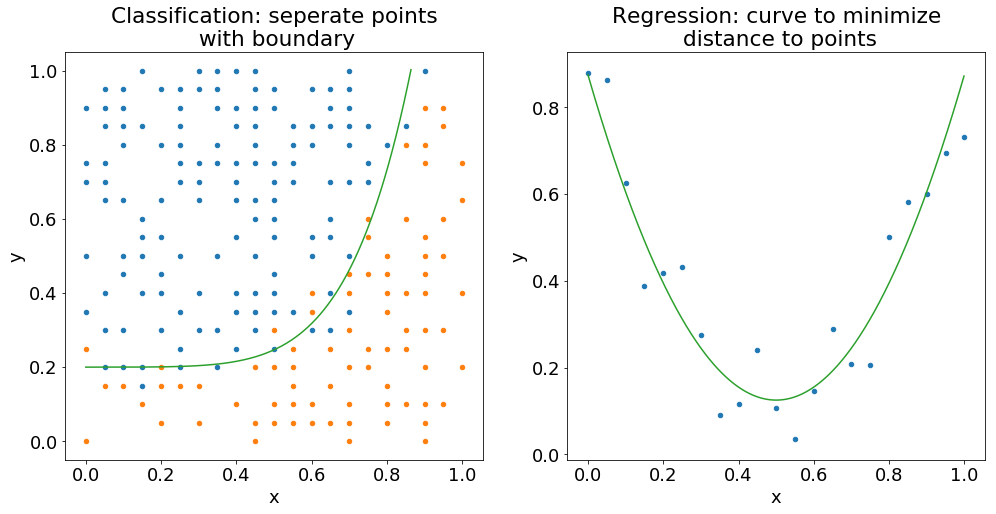

In [8]:
f_identify_answer

## Regression models
*What are examples of regressions models?*

- .

*What is the underlying data of the target, $y$?*

- target is `continuous` 

## Classications models
*What are examples of classication models?*

*What is the underlying data of the target, $y$?*

- target is `categorical` 
  - sometimes known as`factor`
  - can also be `bool` or `int`

## ML concepts
*The basic ML lingo*


- `net-input`, $z_i = \underset{~vector\,form}{\underbrace{\boldsymbol{w}^{T}\boldsymbol{x}_i}} = \underset{~expanded\,form}{\underbrace{w_0+w_1x_{i,1}+...+w_kx_{i,k}}}$

- `feature` vector, $\textbf{x}_i$, i.e a row of input variables
  - ~ explanatory variables in econometrics
- `weight` vector, $\textbf{w}$, i.e model parameters
  - ~ coefficients in econometrics where denoted $\beta$
- `bias` term, $w_0$, i.e. the model intercept
  - ~ the constant variable in denoted $\beta_0$

# The perceptron model 

## The articifial neuron (1)
We are interested in making a decision rule $\phi: \mathbb{R}^p\rightarrow\{-1, 1\}$.

\begin{align}
\phi(z_i)=\begin{cases}
\hfill1, & z_i>0\\
-1, & z_i\le0
\end{cases}
\end{align}

- `unit step function`, $\phi$, checks if value exceeds threshold


## The articifial neuron (2)
Quiz: what are the input dimensions of the neuron, what is the output dimension?

- Input is the p-dimensional space, $\mathbb{R}^p$.
- Output is binary, either $-1$ or $1$.

## The articifial neuron (3)
*The unit step function (left) and the decision boundary (right)*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_02.png' alt="Drawing" style="width: 1000px;"/></center>


## The articifial neuron (4)
*When does the articial neuron work?*


If the two target types are linearly separable:

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_03.png' alt="Drawing" style="width: 1200px;"/></center>


## The perceptron learning rule (1)
*How do we estimate the model parameters?*

1. initialize the weight with small random number
1. for each training observation, i=1,..,n
  1. compute predicted target, $\hat{y}_i$
  1. update weights $\hat{w}$

## The perceptron learning rule (2)
*How do we predict the target?*

Single observation:

\begin{align*}
\hat{y}_i= & \phi(z_i),\quad z_i=w_0+w_1x_{i,1}+...+w_kx_{i,k}, \qquad\mbox{expanded notation}\\
\hat{y}_i= & \phi(z_i),\quad z_i=\hat{\boldsymbol{w}}^{T}\boldsymbol{x}_i, \qquad\mbox{ vector notation}\\
\end{align*}

Multiple observations

\begin{align*}
\hat{\boldsymbol{y}}= & \phi(\boldsymbol{z}),\quad\boldsymbol{z}=\boldsymbol{X}\hat{\boldsymbol{w}} , \qquad\mbox{matrix notation}
\end{align*}


## The perceptron learning rule (3)
*How do we update weights?*

Weights are updated as follows:
\begin{align*}
\hat{w}&=\hat{w}+\Delta\hat{w}\\
\Delta\hat{w}&=\eta\cdot(y_i-\phi(z_i))\cdot \textbf{x}_{i}\end{align*}

where $\eta$ is the learning rate.

## The perceptron learning rule (4)

The computation process

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_04.png' alt="Drawing" style="width: 800px;"/></center>


## Implementation in Python (1)
*How do we compute the errors vectorized?* 

In [23]:
X = np.random.normal(size=(3, 2)) # features
y = np.array([1, -1, 1]) # target
w = np.random.normal(size=(3)) # weight

z = w[0] + X.dot(w[1:]) # net-input

e = y - np.where(z>0, 1, -1) # error 
SSE = e.T.dot(e)

## Implementation in Python (2)
*How do we compute the updated weights?*

In [25]:
eta = 0.001 # learning rate

fod = X.T.dot(e) / 2 # first order derivative

# update weights 
update_vars = eta*fod 
update_bias = eta*e.sum()

## Working with the perceptron (1)
We load the iris data
- drop virginica species
- only use sepal_length and sepal_width

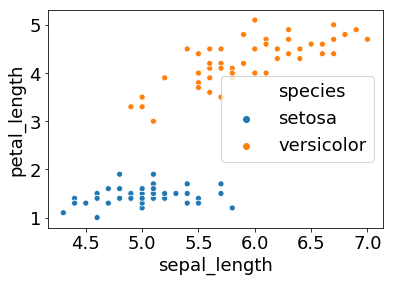

In [30]:
iris = sns.load_dataset('iris').iloc[:100] # drop virginica

X = iris.iloc[:, [0, 2]].values
y = iris.species.map({'setosa':1, 'versicolor':-1}).values

sns.scatterplot(iris.sepal_length, iris.petal_length,hue=iris.species)

## Working with the perceptron (2)
*How do we fit the perceptron model?* [perceptron definition](#Code-from-Raschka-2017)

In [31]:
# initialize the perceptron
clf = Perceptron(n_iter=10)

# fit the perceptron
# runs 10 iterations of updating the model
clf.fit(X, y)

## Working with the perceptron (3)
*How can we evaluate the model??*

Number of errors: 0


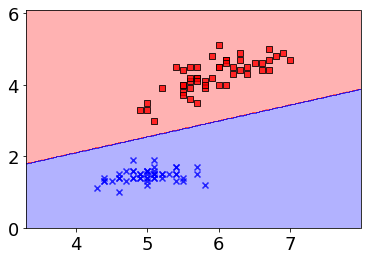

In [32]:
print('Number of errors: %i' % sum(clf.predict(X)!=y))

# we plot the decisions
plot_decision_regions(X,y,clf)

## Working with the perceptron (4)
*How does the model performance change??*

Text(0,0.5,'Number of errors')

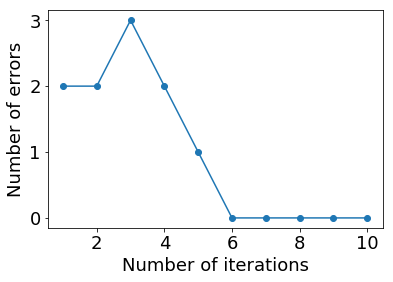

In [29]:
plt.plot(range(1, len(clf.errors_) + 1), clf.errors_, marker='o')
plt.xlabel('Number of iterations')
plt.ylabel('Number of errors')

# Beyond the perceptron

## Motivation
*What might we change about the perceptron?*

1. Change from updating errors that are binary to continuous
2. Use more than one observation a time for updating

## The activation function (1)
*What else might we use to update errors?*

- The most simple is **no transformation** of the net-input, i.e. $\phi(z_i)=z_i$.

## The activation function (2)
*How is this different from the Perceptron?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch02/images/02_09.png' alt="Drawing" style="width: 700px;"/></center>


## The activation function (3)
*Which activation functions can be used?*

- Linear 
- Logistic (Sigmoid)
- Unit step, sign

See page 450 in Raschka and Mirjalili.

## The activation function (4)
*How do Adaline and Logistic regression differ?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch03/images/03_03.png' alt="Drawing" style="width: 700px;"/></center>


## A new objective (1)
*The update rule in perceptron seems ad hoc, is there a more general way?*

- Yes, we minimize the sum of squared errors (SSE). The SSE for Adaline is:
\begin{align}SSE&=\boldsymbol{e}^{T}\boldsymbol{e}\\\boldsymbol{e}&=\textbf{y}-\textbf{X}\textbf{w}\end{align}

*Doesn't the above look strangely familiar?*

- Yes, it is the same objective as OLS.
- But no, we will not solve like OLS.

## A new objective (2)
*So how the hell do we solve the model?*

- We approximate the solution. Two options:
  -  We approximate the first order derivative ~ gradient descent (GD)
  -  We approximate both first and second order derivative ~ quasi Newton
    
- We take gradient descent - much simpler (sometimes faster)

## A new objective (3)
*What is the first order derivative of SSE in Adaline?*

\begin{align}\frac{\partial SSE}{\partial\hat{w}}=\textbf{X}^T\textbf{e},\end{align}


*How do we update with GD in Adaline?*

  - Idea: take small steps to approximate the solution.

  - $\Delta\hat{w}=\eta\textbf{X}^T\textbf{e}=\eta\cdot\textbf{X}^T(\textbf{y}-\hat{\textbf{y}})$

## A new objective (4)
The gradient descent algorithm we just learned uses the whole data.

- Often known as batch gradient descent.

*What might be a smart way of changing (batch) gradient descent?*

- we only use a subset of the data
- this called *stochastic gradient descent* (SGD) 

## Working with the logistic regression (1)
We load the titanic data and split into test and training sample

In [15]:
cols = ['survived','class', 'sex', 'sibsp', 'age', 'alone']

titanic = sns.load_dataset('titanic')
titanic_sub = pd.get_dummies(titanic[cols].dropna(), drop_first=True).astype(np.int64)                

print(titanic_sub.head(2))

X = titanic_sub.drop('survived', axis=1)
y = titanic_sub.survived

   survived  sibsp  age  alone  class_Second  class_Third  sex_male
0         0      1   22      0             0            1         1
1         1      1   38      0             0            0         0


## Working with the logistic regression (2)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# we split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

# estimate model on train data, evaluate on test data
clf = LogisticRegression()
clf.fit(X_train, y_train) # model training
accuracy = (clf.predict(X_test)==y_test).mean() # model testing
print('Model accuracy is:', np.round(accuracy,3))

Model accuracy is: 0.79


# Maximum margin classification

## Motivation
*Do the previous models care for how linear separation is done?*

- No, as long as it classifies correctly then it is indifferent

*Why is this a problem?*

- We could optimize further on the boundary.

## Maximum margin classification
*How might we improve the sepearation?*

We use a Support Vector Machine (SVM) we get a solution. 

SVM finds a decision boundary which maximize distance to nearest points:

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch03/images/03_09.png' alt="Drawing" style="width: 700px;"/></center>


## Support vector machines
*How might we improve SVM?*

- We can use soft-margin classification. This extends the distance to boundary by ignoring a number of miss-classifications, likely outliers.

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch03/images/03_10.png' alt="Drawing" style="width: 700px;"/></center>



- SVM can also handle non-linearities using kernel methods.

# The end
[Return to agenda](#Agenda)